# SenSwiss 2021

Code to run in parallel with the acquisition of images in SpinView and to control the pump.

Instructions: 

* Check that the **exposure time** of the camera is constant 11113us
* Check you have a folder named `/focus` at the main path
* Create a **new folder for the measurement** `/images/NEW_FOLDER_FOR_NEW_TEST` (this needs to be done each time, not in advance!!! (code checks last created folder))
* Follow the instructions below
* For acquisition in SpinView, save the images in the folder you created in step 3 as type .tiff
* If the chip moves at some point, take another image and re-run press_ROI
* Look that everything is okay in the prints
* Press ctrl-j (for like 1-2seconds) when you want to finish computing the preprocessing and analysis and save the results in result.csv, which will be placed in the folder of step 3.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import keyboard
import sys
import serial
import time

import run_parallel
from pump import *
from run_parallel import describe_folders, press_ROIs, run_analysis

ModuleNotFoundError: No module named 'keyboard'

## 0. Pump

To connect the pump to the computer (only done at the very beginning of times).

In [2]:
# Open serial connection -> check COM port on your device
lsp = serial.Serial('COM3', 9600, timeout=1000)  # TODO: change the comport depending on your computer
print('LSPone connected on ', lsp.name)

# Initialise LSPone normally already done
initialise_LSPone(lsp)

NameError: name 'serial' is not defined

In [3]:
# 0. General Cleaning # this were i start
# 2: PBS, 3: Air, 4: Ethanol   (order of the tubes in the pump)
general_cleaning_procedure(lsp)

NameError: name 'general_cleaning_procedure' is not defined

## Starting the measurements

#### 1. Take a photo with SpinView of the spots -> save at `/focus`

#### 2. Create a folder named `/images/NEW_FOLDER_FOR_NEW_TEST` and set everything up in SpinView: photo each 2000ms for 240000ms

#### 3. Aspire the Blocking Buffer

In [4]:
# Sucking BB at 50 ul/min
pick_BB(lsp)

#### 4. Select ROI


In [5]:
# Select ROI
ORIGINAL_FOLDER, IMG_PROCESSED_FOLDER, IMG_FOLDER, DIR_ROI, DIR = describe_folders()
ROIs = press_ROIs(DIR_ROI, ORIGINAL_FOLDER)

THIS IS ORIGINAL FOLDER PATH C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code
C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\focus
['.gitkeep', '20210830_fake.tiff']
ROI PATH C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\focus\20210830_fake.tiff
Select the ROI. Press right button if you want to delete. The last 2 ROIs will be used as background. Press 'q' when you have finished. 
ROIs:
 [[1972 2400  200]
 [2344 1776  200]
 [4152 2532  200]
 [3748  992  200]]


#### 5. Flow the sample

In [7]:
# Push and pull sample at 50 ul/min
push_pull_sample_n_times(lsp, n = 4)

#### 6. Start running preprocess and analysis

In [8]:
# Run processing and analysis
run_analysis(ROIs, IMG_FOLDER=IMG_FOLDER, DIR=DIR, window_size=5, framerate=2, threshold=140)

OBSERVED FOLDER C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake
Press ctrl+j or ctrl+c to exit and save the results
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\yg2vayzp.s5d
num events 0
imgs (0,)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021212927-0.tiff
num events 1
imgs (1, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021212929-1.tiff
num events 2
imgs (2, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021212931-2.tiff
num events 3
imgs (3, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\o05rjpql.zy4
num events 3
imgs (3, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\2021

C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\analysis\Analyse_results_with_connected_components.py:73: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  xvec, yvec = circle(cx, cy, rad)  #TODO: change to disk


Percentage of pixels detected in each ROI (0-1) [0.0006528194635734701, 0.016702624811916342, 0.010763559935991847, 0.011137736945601032]
Percentage of pixels corresponding to Background (0-1) 0.01095064844079644
Percentage of pixels corresponding to Foreground (0-1) 0.008677722137744906
Percentage of pixels corresponding to Signal -0.0022729263030515333
Length of results list 2
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213002-2.tiff
num events 1
imgs (1, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213004-3.tiff
num events 2
imgs (2, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213006-4.tiff
num events 3
imgs (3, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213008-5.tiff
num 

num events 2
imgs (2, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213151-23.tiff
num events 3
imgs (3, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213153-24.tiff
num events 4
imgs (4, 3648, 5472)
filename C:\Users\Administrator\Documents\SENSUS\CODE\SensUs_2021_Code\images\20210830_fake\20210830_fake-08302021213156-25.tiff
num events 5

 Computing temporal median filter with kernel size  5 ...
Averaged images shape:  (1, 3648, 5472)
Correcting background illumination intensity...
Corrected images shape:  (1, 3648, 5472)
Inverting images...
Inverted images shape:  (1, 3648, 5472)
Binarizing images...
Thresholded images shape:  (1, 3648, 5472)
Percentage of pixels detected in each ROI (0-1) [0.04655717345094699, 0.030857661473302073, 0.014688437930403076, 0.01288920379909083]
Percentage of pixels corresponding to Background (0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



You Pressed a Key!
Last results list (you pressed "ctrl+j") [[], [-0.0022729263030515333, 0.008677722137744906, 0.01095064844079644], [0.00029456487990510254, 0.010851133278666337, 0.010556568398761235], [0.0062614940012260265, 0.010309770796678582, 0.004048276795452555], [0.006361009163356129, 0.010019186523258684, 0.003658177359902555], [0.025830155482489313, 0.041282869858051574, 0.015452714375562261], [0.02499024751411125, 0.03864770836484647, 0.013657460850735218], [0.024918596597377572, 0.03870741746212453, 0.013788820864746953]]
y [-0.0022729263030515333, 0.00029456487990510254, 0.0062614940012260265, 0.006361009163356129, 0.025830155482489313, 0.02499024751411125, 0.024918596597377572]
x [ 0 10 20 30 40 50 60]
reg_lin [ 0.00053762 -0.00378826]
slope 0.0005376235551820102
concentration 8.278807346542829
Saving results as result.csv
Last results list [[], [-0.0022729263030515333, 0.008677722137744906, 0.01095064844079644], [0.00029456487990510254, 0.010851133278666337, 0.01055656

TypeError: object of type 'NoneType' has no len()

#### 7. SpinView start recording -> save at `/images/NEW_FOLDER_FOR_NEW_TEST` as soon as you see liquid

#### 8. View results (change name)

<AxesSubplot:>

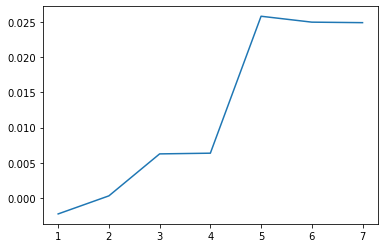

In [10]:
# Loading results
result_df = pd.read_csv('./images/20210830_fake/result.csv')   # TODO CHANGE NAME
result_df['Signal'].plot()

In [ ]:
# Running in parallel (if you want to run all at once)
# run_parallel.main()

#### 9. Clean pump

In [3]:
# 0. General Cleaning 
# 2: PBS, 3: Air, 4: Ethanol   (order of the tubes in the pump)
general_cleaning_procedure_fast(lsp)